# Advanced Programme in Deep Learning (Foundations and Applications)
## A Program by IISc and TalentSprint
### Assignment : IoT and Edge Devices - CNN to classify Cifar 10 dataset using TFLite

### Learning Objectives:

At the end of the experiment, you will be able to:

*  train and evaluate a CNN model on CIFAR10 dataset using Tensorflow
*  convert a Tensorflow model to TensorflowLite for Microcontrollers
*  test the TFLite Model using TFLite Interpreter
*  understand the types of optimization in TFLite - quantization, pruning and clustering
*  prune and fine-tune the model to 50% sparsity
*  apply sparsity preserving clustering on the pruned model and observe the number of clusters and check that the sparsity is preserved
*  apply both QAT and PCQAT on the sparse clustered model
*  evaluate the model, which has been pruned, clustered and quantized and then check the accuracy from TensorFlow persists in the TFLite backend.


## Dataset

#### Description

In this experiment, we will use the CIFAR-10 dataset from keras API. It consists of 60,000 colour images(32x32) in 10 classes, with 6000 images per class. There are 50,000 training images and 10,000 test images.



Here are the classes in the dataset, as well as 10 random images from each:


<img src="https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Images/CIFAR10.png" alt="Drawing" height="350" width="440"/>


### CNN to classify Cifar-10 dataset (Images)



So far, we saw how to build a Dense Neural Network (DNN) that classified images of digits (MNIST) or even fashion images (Fashion-MNIST). Here we will instead, recognize the 10 classes of CIFAR ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship' and 'truck'). There are some key differences between these two image datasets that we need to take into account.

First, while MNIST were 28x28 monochrome images (1 color channel), CIFAR is 32x32 color images (3 color channels).

Second, MNIST images are simple, containing just the object centered in the image, with no background. Conversely, CIFAR ones are not centered and can have the object with a background, such as airplanes that might have a cloudy sky behind them! Those differences are the main reason to use a CNN instead of a DNN.

## Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2236974" #@param {type:"string"}

In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "7259357831" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()

notebook= "M3_AST_32_CNN_Cifar_10_TFLite_C" #name of the notebook

def setup():
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dlfa-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError
    else:
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError
    else:
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing required libraries

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix

### Import and Inspect the Dataset

Cifar-10 repository: https://www.cs.toronto.edu/~kriz/cifar.html





In [5]:
# From tensorflow import and download the cifar10 dataset
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [6]:
# Check for the shape of train and test images
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


- The image data shape is: `(#images, img_heigth, img_width, #channels)`, where channels are in RGB format (red, green, blue).
- The labels shape is `(#images, label)`, where label goes from 0 to 9.


In [7]:
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

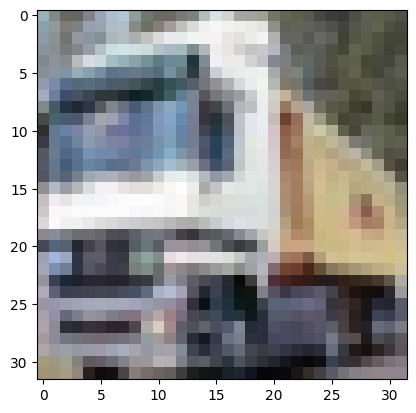

In [8]:
# Plotting the sample image from the dataset
plt.imshow(train_images[1]);

In [9]:
# The CIFAR labels happen to be arrays, which is why you need the extra index
train_labels[1][0]

9

In [10]:
# CIFAR10 labels/classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [11]:
class_names[9] # The List's index is the label

'truck'

In [12]:
idx = train_labels[1][0]
class_names[idx]

'truck'

	 truck


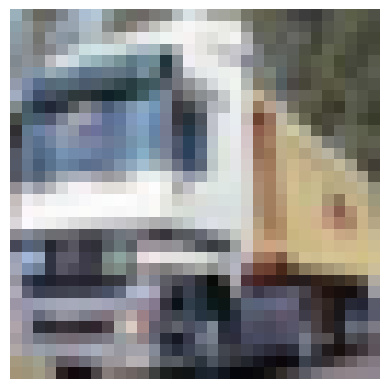

In [13]:
print("\t", class_names[train_labels[1][0]])
plt.imshow(train_images[1])
plt.axis('off');

### Visualize the images from trainset

In [14]:
def plot_train_img(img, size=2):
    label = train_labels[img][0]
    plt.figure(figsize=(size,size))
    print("Label {} - {}".format(label, class_names[label]))
    plt.imshow(train_images[img])
    plt.axis('off')
    plt.show()

Label 1 - automobile


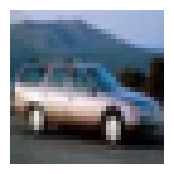

In [15]:
plot_train_img(4)

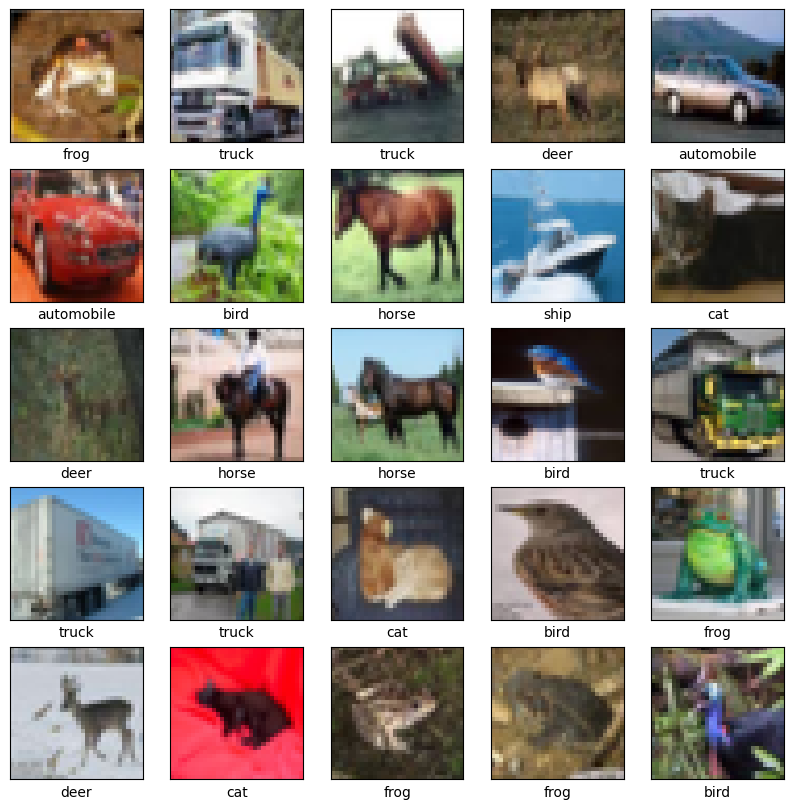

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Note that images are in color, not centered and with different backgrounds

### Preprocessing the Images (Train and Test)

In [17]:
test_images.max()

255

In [18]:
# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [19]:
test_images.max()

1.0

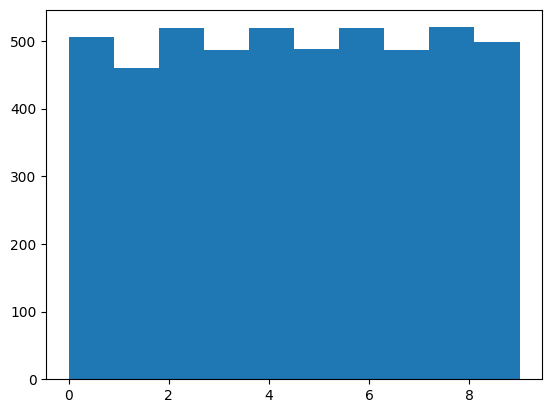

In [20]:
plt.hist(train_labels[:5000]);

In [21]:
# Validation set
val_images = train_images[:5000]
val_labels = train_labels[:5000]
print(val_images.shape, val_labels.shape)

(5000, 32, 32, 3) (5000, 1)


In [22]:
train_images = train_images[5000:]
train_labels = train_labels[5000:]
print(train_images.shape, train_labels.shape)

(45000, 32, 32, 3) (45000, 1)


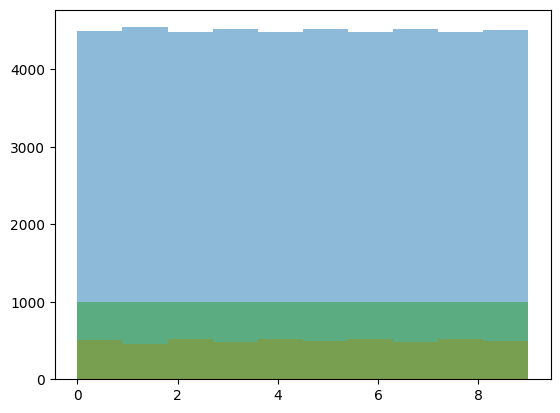

In [23]:
plt.hist(train_labels, alpha=0.5)
plt.hist(val_labels, alpha=0.5)
plt.hist(test_labels, alpha=0.5);

### Create CNN Model Architecture and Compile

In `tf.nn.conv2d()`: [Convolution layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)

* **images** is the input mini-batch (a 4D tensor).

* **filters** is the set of filters to apply (also a 4D tensor).

* **strides** is an integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. Default (1,1).

* **padding** must be either "SAME" or "VALID": Default = 'VALID'

  * If set to "SAME", the convolutional layer uses zero padding if necessary. The output size is set to the number of input neurons divided by the stride, rounded up. For example, if the input size is 13 and the stride is 5 as shown in the figure below, then the output size is 3 (i.e., 13 / 5 = 2.6, rounded up to 3). Then zeros are added as evenly as possible around the inputs, as needed.

  * If set to "VALID", the convolutional layer does not use zero padding and may
ignore some rows and columns at the bottom and right of the input image,
depending on the stride. This means that every neuron’s receptive field lies strictly within valid positions inside the input, hence the name valid.
<br><br>
<center>
<img src="https://wizardforcel.gitbooks.io/scikit-and-tensorflow-workbooks-bjpcjp/content/pics/padding-options.png" width=450px/>
</center>
$\hspace{9.5cm} \text {Different padding options}$

In [24]:
model = Sequential()

model.add(Conv2D(
    filters=32,
    kernel_size=(3,3),
    activation='relu',
    input_shape=(32, 32, 3))
)
model.add(MaxPool2D(2, 2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [25]:
# Define the optimizer and loss
LOSS = 'sparse_categorical_crossentropy'
OPTIMIZER = 'adam'

# Compile the model
model.compile(optimizer=OPTIMIZER,
              loss=LOSS,
              metrics=['accuracy'])

### Train the model


In [26]:
NUM_EPOCHS = 20

early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [27]:
# Fit the model
history = model.fit(train_images,
                    train_labels,
                    epochs=NUM_EPOCHS,
                    validation_data=(val_images, val_labels),
                    callbacks=[early_stop]
)

Epoch 1/20
1407/1407 [==============================] - 18s 5ms/step - loss: 1.5083 - accuracy: 0.4555 - val_loss: 1.2068 - val_accuracy: 0.5756
Epoch 2/20
1407/1407 [==============================] - 7s 5ms/step - loss: 1.1418 - accuracy: 0.6006 - val_loss: 1.0609 - val_accuracy: 0.6424
Epoch 3/20
1407/1407 [==============================] - 6s 4ms/step - loss: 1.0161 - accuracy: 0.6456 - val_loss: 0.9878 - val_accuracy: 0.6662
Epoch 4/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.9258 - accuracy: 0.6800 - val_loss: 0.9674 - val_accuracy: 0.6666
Epoch 5/20
1407/1407 [==============================] - 8s 5ms/step - loss: 0.8620 - accuracy: 0.7029 - val_loss: 0.9544 - val_accuracy: 0.6774
Epoch 6/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.8061 - accuracy: 0.7232 - val_loss: 0.9109 - val_accuracy: 0.6892
Epoch 7/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.7576 - accuracy: 0.7371 - val_loss: 0.9101 - val_accuracy

### Visualize accuracy vs no. of epochs

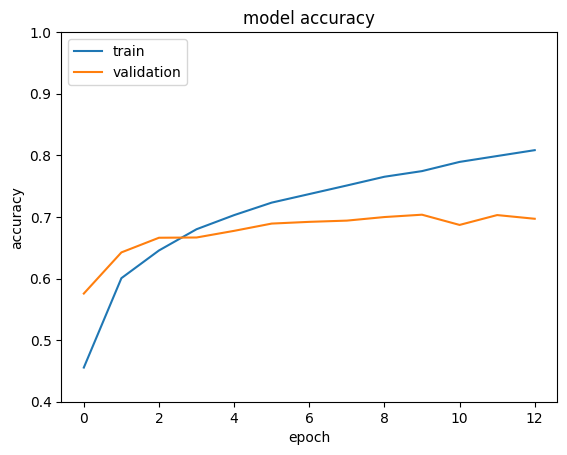

In [28]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()

### Evaluate the Model

In [29]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.9948 - accuracy: 0.6939


[0.9948174953460693, 0.6938999891281128]

**Accuracy**
- Train: 85% - 90%;
- Validation: 68%-70%
- Test: 66%-68%

In [30]:
# Model predictions
predictions = np.argmax(model.predict(test_images), axis=-1)
predictions.shape

313/313 [==============================] - 1s 2ms/step


(10000,)

In [31]:
# Print the classification report
print(classification_report(test_labels, predictions, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.72      0.76      0.74      1000
  automobile       0.79      0.82      0.81      1000
        bird       0.58      0.58      0.58      1000
         cat       0.50      0.54      0.52      1000
        deer       0.62      0.67      0.64      1000
         dog       0.61      0.56      0.59      1000
        frog       0.82      0.73      0.77      1000
       horse       0.73      0.75      0.74      1000
        ship       0.81      0.78      0.79      1000
       truck       0.78      0.75      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [32]:
# Print the confusion matrix
confusion_matrix(test_labels,predictions)

array([[756,  21,  61,  19,  23,   4,   6,  11,  64,  35],
       [ 30, 818,  11,   9,   6,   7,   5,   3,  24,  87],
       [ 57,  12, 578,  71,  98,  67,  46,  48,  15,   8],
       [ 26,  14,  62, 539,  80, 157,  47,  40,  19,  16],
       [ 20,   6,  81,  64, 671,  31,  24,  86,  14,   3],
       [ 10,   5,  70, 206,  55, 563,  14,  62,   6,   9],
       [ 12,   4,  48,  85,  77,  30, 730,   5,   5,   4],
       [ 22,   5,  44,  47,  59,  42,   7, 753,   6,  15],
       [ 79,  42,  26,  15,   8,   9,   2,   8, 781,  30],
       [ 39, 102,  12,  28,   8,   7,   5,  14,  35, 750]])

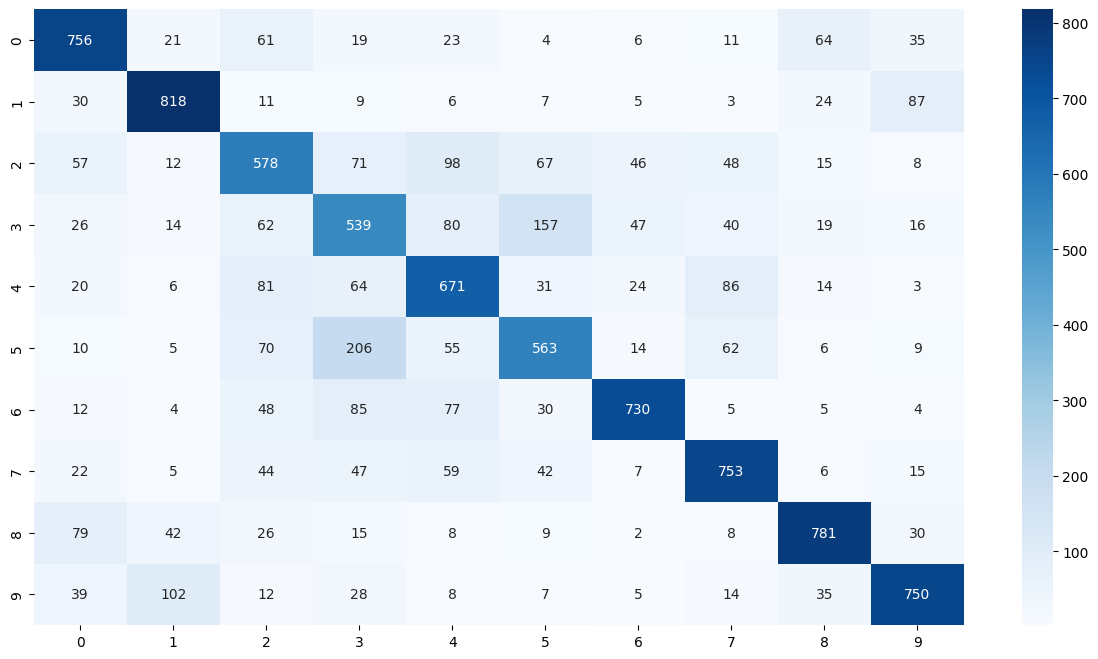

In [33]:
# Plot the heatmap
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(test_labels,predictions), cmap='Blues', annot=True, fmt='g');

### Testing the Model (Predicting)

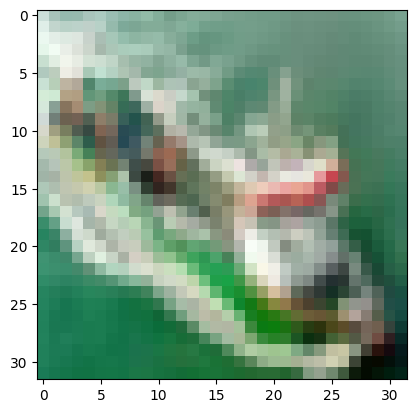

In [34]:
plt.imshow(test_images[15]);

In [35]:
test_labels[15][0]

8

In [36]:
class_names[8]

'ship'

In [37]:
test_images[15].shape

(32, 32, 3)

The input Tensor shape should be: (num_images, width, height, color_channels)

In [38]:
my_image = test_images[15]
my_image = my_image.reshape(1,32,32,3)
my_image.shape

(1, 32, 32, 3)

In [39]:
# Using trained CNN model to predict the image
model.predict(my_image)

1/1 [==============================] - 0s 90ms/step


array([[6.8792766e-03, 1.5338785e-02, 6.5076421e-04, 1.2914268e-02,
        1.2445474e-02, 1.2542899e-03, 2.6588610e-01, 2.0372447e-04,
        6.8381310e-01, 6.1425258e-04]], dtype=float32)

In [40]:
# Taking max probability from the predictions
img_pred = np.argmax(model.predict(my_image))
class_names[img_pred]

1/1 [==============================] - 0s 21ms/step


'ship'

In [41]:
img_pred

8

In [42]:
pred_prob = model.predict(my_image)[0][img_pred]
pred_prob

1/1 [==============================] - 0s 18ms/step


0.6838131

### Visualizing model predictions

In [43]:
def img_pred(img, size=4):
    label = test_labels[img][0]
    my_image = test_images[img]
    plt.figure(figsize=(size,size))
    plt.imshow(my_image)
    my_image = my_image.reshape(1,32,32,3)
    img_pred = np.argmax(model.predict(my_image))
    pred_label = class_names[img_pred]
    pred_prob = model.predict(my_image)[0][img_pred]
    print(" Label {} <=> Pred: {} with prob {:.2}".format(
        class_names[label],
        pred_label,
        pred_prob))
    plt.grid(False)
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 21ms/step
 Label cat <=> Pred: cat with prob 0.89


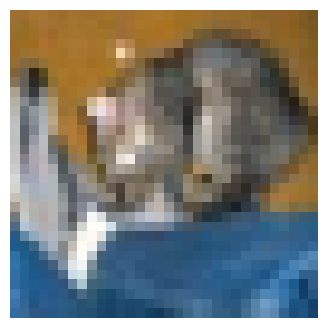

In [44]:
img_pred(0)

1/1 [==============================] - 0s 19ms/step
 Label cat <=> Pred: cat with prob 0.89


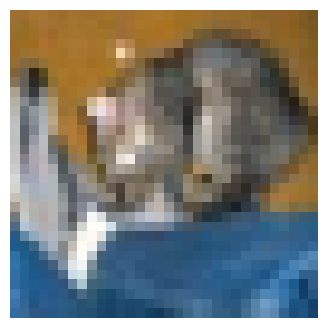

1/1 [==============================] - 0s 21ms/step
 Label ship <=> Pred: ship with prob 0.99


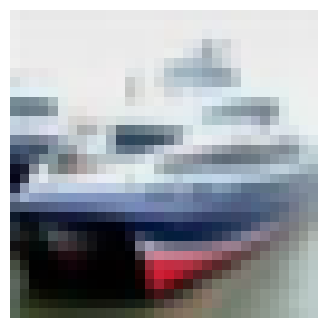

1/1 [==============================] - 0s 18ms/step
 Label ship <=> Pred: ship with prob 0.42


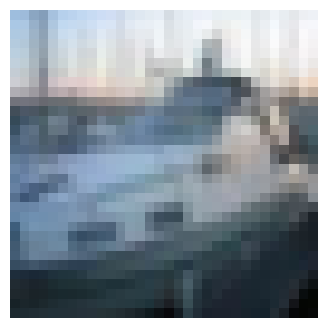

1/1 [==============================] - 0s 24ms/step
 Label airplane <=> Pred: airplane with prob 0.97


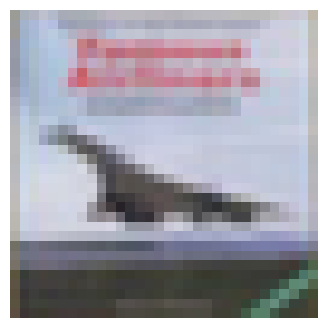

1/1 [==============================] - 0s 24ms/step
 Label frog <=> Pred: deer with prob 0.78


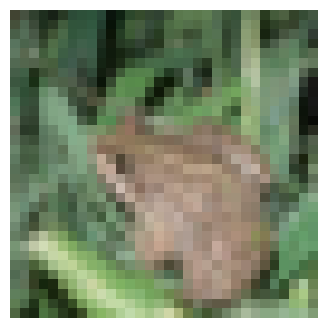

1/1 [==============================] - 0s 17ms/step
 Label frog <=> Pred: frog with prob 0.91


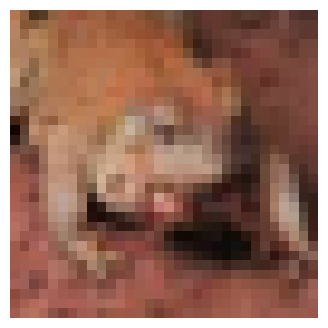

1/1 [==============================] - 0s 17ms/step
 Label automobile <=> Pred: automobile with prob 0.63


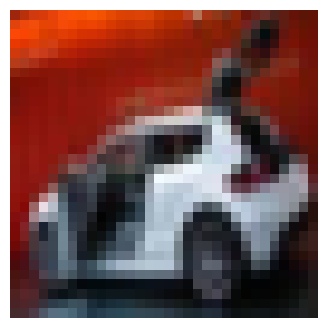

1/1 [==============================] - 0s 19ms/step
 Label frog <=> Pred: frog with prob 0.93


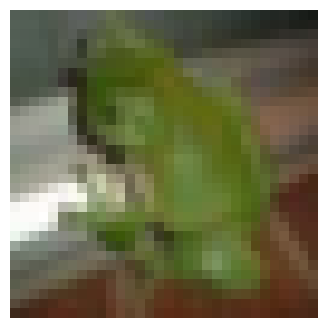

1/1 [==============================] - 0s 18ms/step
 Label cat <=> Pred: cat with prob 0.94


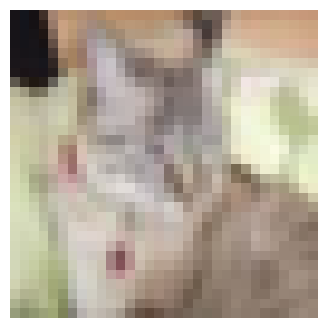

1/1 [==============================] - 0s 16ms/step
 Label automobile <=> Pred: automobile with prob 0.99


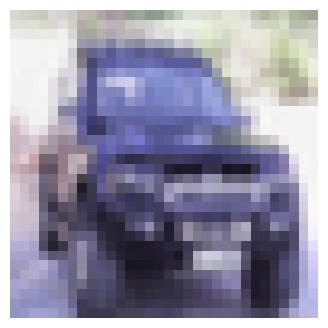

In [45]:
for i in range (10):
  img_pred(i)

### Saving the model

In [46]:
!pwd # Linux command, shows where we are in CoLab's folders

/content


In [47]:
model.save('cifar_10_model')

Use [Netron](https://netron.app) to visualize the model, hyperparameters, tensor shapes, etc. Netron is a viewer for neural network, deep learning and machine learning models (See [GitHub](https://github.com/lutzroeder/netron) for instructions about instalation in your desktop).

## Converting to TensorFlow Lite

TensorFlow Lite is TensorFlow’s lightweight solution to run TensorFlow models on mobile, embedded and IoT devices with low latency quickly. With TensorFlow Lite we can perform classification and regression task without incurring server cost.

TensorFlow Lite model supported on both Andriod and iOS via C++ and Java API. Generally, the size of the TensorFlow model is quite big that we can’t run it as it is on mobile and other embedded devices with limited compute and memory resources. So to make it possible to run TensorFlow model on low processing devices,  TensorFlow introduces a lightweight solution i.e TensorFlow Lite.

Before we start with TFLite, we need a trained model that is trained on a set of data using a high powered machine. This trained model can be converted to TensorFlow Lite format. We cannot create or train a model using TensorFlow  Lite. So, we must start with a regular TensorFlow model and then convert it to TFLite.

The next step is to convert the saved TensorFlow model to TensorFlow Lite model using TFLite converter. TensorFlow Lite model is an optimized FlatBuffer format identified by the` .tflite` file extension. Flatbuffers is a special serialization format that is optimized for performance.

### Your Task starts here

In [48]:
# Initiate the Conversion of the saved model here
converter = tf.lite.TFLiteConverter.from_keras_model(model) # path to the SavedModel directory

In [49]:
# Convert the model to the TensorFlow Lite format without quantization
tflite_model = converter.convert()

In [50]:
# Save the .tflite model
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [51]:
# Another way of Saving .tflite model
open("/content/cifar10.tflite","wb").write(tflite_model)

673648

Here, the return value 673260 is the size (in bytes) of the generated TensorFlow Lite model with no quantization. We can even significantly reduce the TFLite model size by applying quantization.

### Dynamic range quantization

The simplest form of post-training quantization statically quantizes only the weights from floating point to integer, which has 8-bits of precision:

#### Convert using default quantization

Now let's enable the default `optimizations` flag to quantize all fixed parameters (such as weights):
Here, we are using saved model API. Will be useful for your custom trained model for conversion.

In [52]:
# Initiate the Conversion of the saved model here
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Set the optimization flag
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convert the model to tflite here
tflite_quant_model = converter.convert()

At inference, weights are converted from 8-bits of precision to floating point and computed using floating-point kernels. This conversion is done once and cached to reduce latency.

To further improve latency, "dynamic-range" operators dynamically quantize activations based on their range to 8-bits and perform computations with 8-bit weights and activations. This optimization provides latencies close to fully fixed-point inference. However, the outputs are still stored using floating point so that the speedup with dynamic-range ops is less than a full fixed-point computation.

In [53]:
# Save .tflite model
open("/content/cifar10_quant.tflite","wb").write(tflite_quant_model)

176848

Use [Netron](https://netron.app) to visualize the quantized model. Pay attention that now the weights are int8.

### Testing TFLite Model

The converted TFLite model can be executed on mobile, embedded and IoT devices. The `TensorFlow Lite Interpreter` used to run an inference with TFLite model. `TensorFlow Lite Interpreter` is a library that takes a TFLite model file, executes the operations on input data and provide output.

Interpreter support multiple platforms and provide API to execute TFLite model from Java, C++, Python, Swift and Objective-C.

When you receive results from the model inference, you must interpret the tensors in a meaningful way that's useful in your application.

For example, a model might return only a list of probabilities. It's up to you to map the probabilities to relevant categories and present it to your end-user.

In [54]:
# Initialize the TFLite interpreter
# Now let’s load TFLite models into Interpreter (tf.lite.Interpreter) representation, so we can run the inference process on it.
# Load the TFLite model in TFLite Interpreter
interpreter = tf.lite.Interpreter("/content/cifar10_quant.tflite")

tflite_model can be saved to a file and loaded later, or directly into the Interpreter. Since TensorFlow Lite pre-plans tensor allocations to optimize inference, the user needs to call allocate_tensors() before any inference.

In [55]:
# Load the TFLite model and allocate tensors
interpreter.allocate_tensors() # Needed before execution!

# Get input and output tensors.
input_details = interpreter.get_input_details()   # Model has single input
output_details = interpreter.get_output_details() # Model has single output

The `input_details` represents the pieces of information related to input data formats such as the shape of input data, the data type of input and other various information related to quantization. And output_details contains information related to the model output format.

In [56]:
input_details

[{'name': 'serving_default_conv2d_input:0',
  'index': 0,
  'shape': array([ 1, 32, 32,  3], dtype=int32),
  'shape_signature': array([-1, 32, 32,  3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

Gets model input tensor details.

Returns:

A list in which each item is a dictionary with details about an input tensor. Each dictionary contains the following fields that describe the tensor:
* name: The tensor name.

* index: The tensor index in the interpreter.

* shape: The shape of the tensor.

* shape_signature: Same as shape for models with known/fixed shapes. If any dimension sizes are unkown, they are indicated with -1.

* dtype: The numpy data type (such as np.int32 or np.uint8).

* quantization: Deprecated, use quantization_parameters. This field only works for per-tensor quantization, whereas quantization_parameters works in all cases.

* quantization_parameters: A dictionary of parameters used to quantize the tensor: ~ scales: List of scales (one if per-tensor quantization). ~ zero_points: List of zero_points (one if per-tensor quantization). ~ quantized_dimension: Specifies the dimension of per-axis quantization, in the case of multiple scales/zero_points.

* sparsity_parameters: A dictionary of parameters used to encode a sparse tensor. This is empty if the tensor is dense.

In [57]:
output_details

[{'name': 'StatefulPartitionedCall:0',
  'index': 17,
  'shape': array([ 1, 10], dtype=int32),
  'shape_signature': array([-1, 10], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

Gets model output tensor details.

Returns: A list in which each item is a dictionary with details about an output tensor.

In [58]:
def set_input_tensor(interpreter, image):
    tensor_index = interpreter.get_input_details()[0]['index']
    input_tensor = interpreter.tensor(tensor_index)()[0]
    input_tensor[:, :] = image

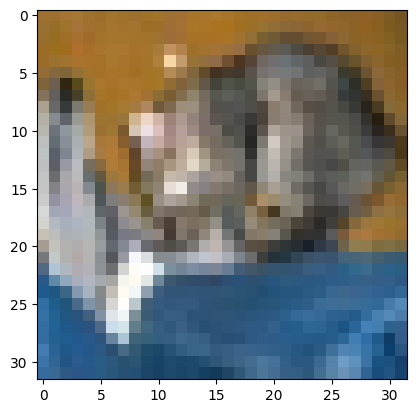

In [59]:
image = test_images[0]
plt.imshow(image);

In [60]:
set_input_tensor(interpreter, image)

# Run inference.
interpreter.invoke()
output_details = interpreter.get_output_details()[0]

In [61]:
# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
interpreter.get_tensor(output_details['index'])

array([[4.5088134e-04, 1.7314290e-03, 2.9186464e-03, 8.8757998e-01,
        3.6956402e-04, 7.2780617e-02, 3.3113815e-02, 9.1870861e-05,
        8.8440452e-04, 7.8793011e-05]], dtype=float32)

get_tensor(
    tensor_index
) : Gets the value of the output tensor (get a copy).

If you wish to avoid the copy, use tensor(). This function cannot be used to read intermediate results.

Args:

tensor_index: Tensor index of tensor to get. This value can be gotten from the 'index' field in get_output_details.

Returns
a numpy array.

In [62]:
np.squeeze(interpreter.get_tensor(output_details['index']))

array([4.5088134e-04, 1.7314290e-03, 2.9186464e-03, 8.8757998e-01,
       3.6956402e-04, 7.2780617e-02, 3.3113815e-02, 9.1870861e-05,
       8.8440452e-04, 7.8793011e-05], dtype=float32)

In [63]:
output = np.squeeze(interpreter.get_tensor(output_details['index']))
output

array([4.5088134e-04, 1.7314290e-03, 2.9186464e-03, 8.8757998e-01,
       3.6956402e-04, 7.2780617e-02, 3.3113815e-02, 9.1870861e-05,
       8.8440452e-04, 7.8793011e-05], dtype=float32)

In [64]:
output.shape

(10,)

In [65]:
img_pred = np.argmax(output)
class_names[img_pred]

'cat'

In [66]:
img_pred

3

In [67]:
output[img_pred]

0.88758

In [68]:
def classify_image(image):
    set_input_tensor(interpreter, image)
    interpreter.invoke()
    output_details = interpreter.get_output_details()[0]
    output = np.squeeze(interpreter.get_tensor(output_details['index']))
    img_pred = np.argmax(output)
    pred_label = class_names[img_pred]
    pred_prob = output[img_pred]
    plt.imshow(image)
    print(" Pred: {} with prob {:.2}".format(
        pred_label,
        pred_prob))
    plt.grid(False)
    plt.axis('off')
    plt.show()

 Pred: cat with prob 0.89


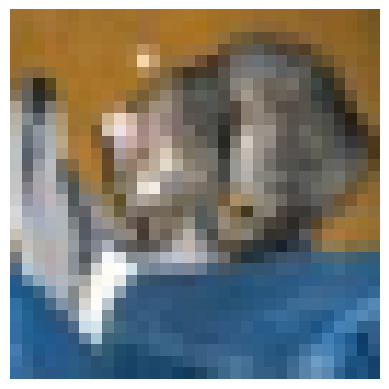

In [69]:
classify_image(test_images[0])

 Pred: cat with prob 0.89


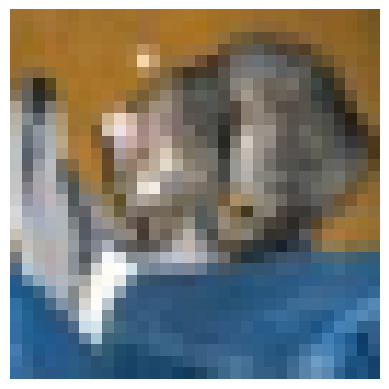

 Pred: ship with prob 0.99


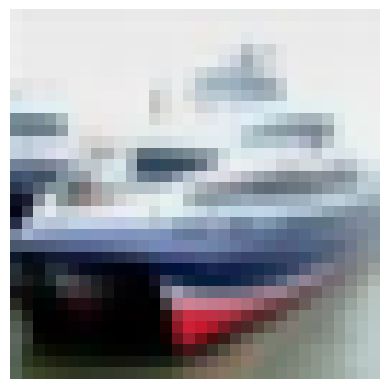

 Pred: ship with prob 0.42


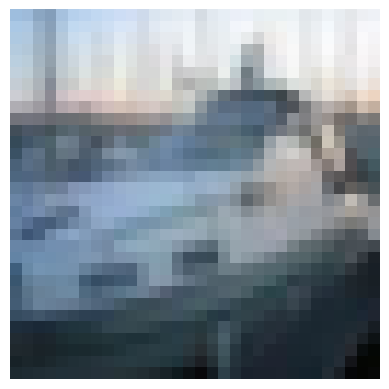

 Pred: airplane with prob 0.97


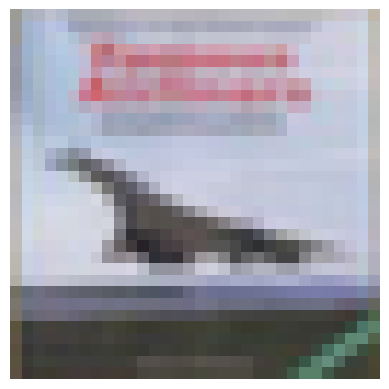

 Pred: deer with prob 0.78


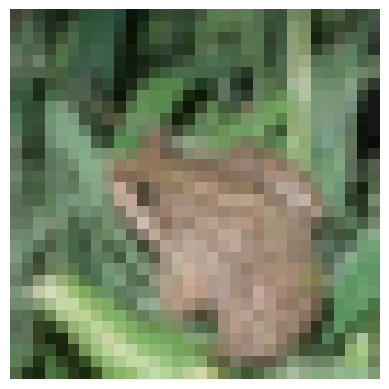

 Pred: frog with prob 0.9


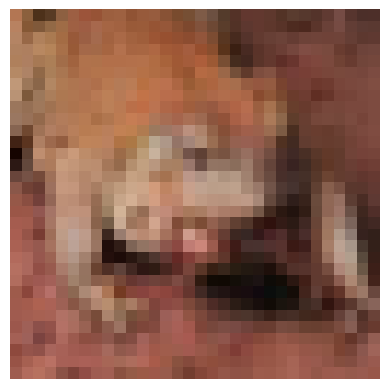

 Pred: automobile with prob 0.63


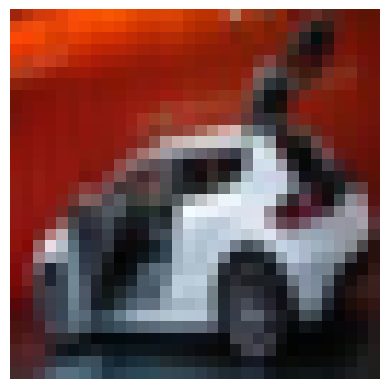

 Pred: frog with prob 0.93


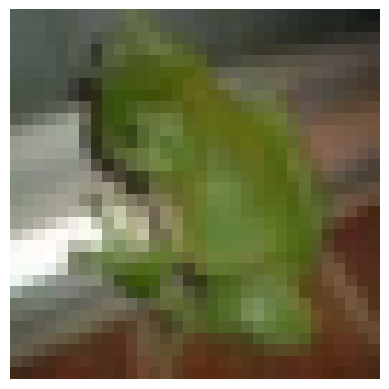

 Pred: cat with prob 0.94


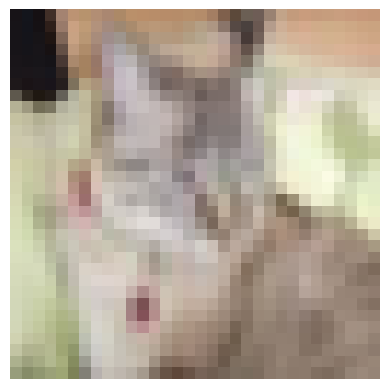

 Pred: automobile with prob 0.99


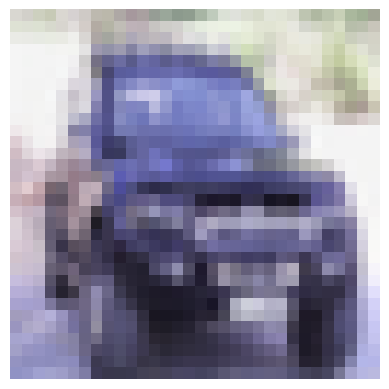

In [70]:
for i in range (10):
  classify_image(test_images[i])

## Initiate TFlite optimization

**Note:** Refer the following [link ](https://www.tensorflow.org/model_optimization/)

In [71]:
pip install -q tensorflow-model-optimization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 5.5 MB/s eta 0:00:00


In [72]:
import numpy as np
import tempfile
import zipfile
import os

 Evaluate the baseline model and save it for later usage

In [73]:
_, baseline_model_accuracy = model.evaluate(
    test_images, test_labels, verbose=0)

print('Baseline test accuracy:', baseline_model_accuracy)

_, keras_file = tempfile.mkstemp('.h5')
print('Saving model to: ', keras_file)
tf.keras.models.save_model(model, keras_file, include_optimizer=False)

Baseline test accuracy: 0.6938999891281128
Saving model to:  /tmp/tmp_25kx074.h5


### Prune and fine-tune the model to 50% sparsity


Apply the prune_low_magnitude() API to prune the whole pre-trained model to achieve the model that is to be clustered in the next step. For how best to use the API to achieve the best compression rate while maintaining your target accuracy, refer to the [pruning comprehensive guide](https://www.tensorflow.org/model_optimization/guide/pruning/comprehensive_guide).

#### Define the model and apply the sparsity API


To make the whole model train with pruning, apply `tfmot.sparsity.keras.prune_low_magnitude` to the model.

In [74]:
import tensorflow_model_optimization as tfmot

# define a list containing the names or types of the
# layers that shall be pruned, and iterate the layer-wise pruning over all layers in this list
prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude # Provide the type of sparsity API

# Pruning schedule with constant sparsity(%) throughout training
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.ConstantSparsity(0.5, begin_step=0, frequency=10) # Provide the sparsity value
  }

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep() # Keras callback which updates pruning wrappers with the optimizer step and is required during training.
]

pruned_model = prune_low_magnitude(model, **pruning_params)

# Use smaller learning rate for fine-tuning
opt = tf.keras.optimizers.Adam(learning_rate=1e-5)

# Compile the pruned model
pruned_model.compile(
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer=opt,
  metrics=['accuracy'])

In [75]:
# Print the pruned model
pruned_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_conv2d  (None, 30, 30, 32)        1762      
  (PruneLowMagnitude)                                            
                                                                 
 prune_low_magnitude_max_po  (None, 15, 15, 32)        1         
 oling2d (PruneLowMagnitude                                      
 )                                                               
                                                                 
 prune_low_magnitude_conv2d  (None, 13, 13, 64)        36930     
 _1 (PruneLowMagnitude)                                          
                                                                 
 prune_low_magnitude_max_po  (None, 6, 6, 64)          1         
 oling2d_1 (PruneLowMagnitu                                      
 de)                                                    

### Fine-tune the model, check sparsity, and evaluate the accuracy against baseline

Fine-tune the model with pruning for 3 epochs.

In [76]:
# Fine-tune model
pruned_model.fit(
  train_images,
  train_labels,
  epochs=3,
  validation_split=0.1,
  callbacks=callbacks)

Epoch 1/3
1266/1266 [==============================] - 26s 13ms/step - loss: 1.1975 - accuracy: 0.6248 - val_loss: 0.7932 - val_accuracy: 0.7229
Epoch 2/3
1266/1266 [==============================] - 13s 10ms/step - loss: 0.7189 - accuracy: 0.7460 - val_loss: 0.6201 - val_accuracy: 0.7884
Epoch 3/3
1266/1266 [==============================] - 9s 7ms/step - loss: 0.5990 - accuracy: 0.7910 - val_loss: 0.5548 - val_accuracy: 0.8084


### Define helper functions to calculate and print the sparsity and clusters of the model.

In [77]:
def print_model_weights_sparsity(model):
    for layer in model.layers:
        if isinstance(layer, tf.keras.layers.Wrapper):
            weights = layer.trainable_weights
        else:
            weights = layer.weights
        for weight in weights:
            if "kernel" not in weight.name or "centroid" in weight.name:
                continue
            weight_size = weight.numpy().size
            zero_num = np.count_nonzero(weight == 0)
            print(
                f"{weight.name}: {zero_num/weight_size:.2%} sparsity ",
                f"({zero_num}/{weight_size})",
            )

# Define helper functions to calculate and print the number of clustering in each kernel of the model.
def print_model_weight_clusters(model):
    for layer in model.layers:
        if isinstance(layer, tf.keras.layers.Wrapper):
            weights = layer.trainable_weights
        else:
            weights = layer.weights
        for weight in weights:
            # ignore auxiliary quantization weights
            if "quantize_layer" in weight.name:
                continue
            if "kernel" in weight.name:
                unique_count = len(np.unique(weight))
                print(
                    f"{layer.name}/{weight.name}: {unique_count} clusters "
                )

Let's strip the pruning wrapper first, then check that the model kernels were correctly pruned.

 `tfmot.sparsity.keras.strip_pruning` Strip pruning wrappers from the model and is necessary to see the compression
benefits of pruning.

*   `strip_pruning:` Once a model has been pruned to required sparsity, this method can be used to restore the original model with the sparse weights.


First, create a compressible model for TensorFlow.

In [78]:
stripped_pruned_model = tfmot.sparsity.keras.strip_pruning(pruned_model) # Pass the pruned model

print_model_weights_sparsity(stripped_pruned_model)

conv2d/kernel:0: 50.00% sparsity  (432/864)
conv2d_1/kernel:0: 50.00% sparsity  (9216/18432)
dense/kernel:0: 50.00% sparsity  (73728/147456)
dense_1/kernel:0: 50.00% sparsity  (320/640)


### Apply sparsity preserving clustering and check its effect on model sparsity in both cases

Next, we apply both clustering and sparsity preserving clustering on the pruned model and observe the number of clusters and check that the sparsity is preserved on the pruned model.  Generate a TFLite model and check that the accuracy has been preserved in the pruned clustered model.

Clustering, or weight sharing, reduces the number of unique weight values in a model, leading to benefits for deployment. It first groups the weights of each layer into N clusters, then shares the cluster's centroid value for all the weights belonging to the cluster. This technique brings improvements via model compression.


Note that we stripped pruning wrappers from the pruned model with tfmot.sparsity.keras.strip_pruning before applying the clustering API.

### Fine-tune the pre-trained model with clustering

Apply the cluster_weights() API to a whole pre-trained model to demonstrate its effectiveness in reducing the model size after applying zip while keeping decent accuracy.

#### Define the model and apply the clustering API

Before you pass the model to the clustering API, make sure it is trained and shows some acceptable accuracy.

In [79]:
import tensorflow_model_optimization as tfmot

# Sparsity preserving clustering
from tensorflow_model_optimization.python.core.clustering.keras.experimental import (
    cluster,
)

# Clustering
cluster_weights = tfmot.clustering.keras.cluster_weights # Provide the type of sparsity API
CentroidInitialization = tfmot.clustering.keras.CentroidInitialization

cluster_weights = cluster.cluster_weights

clustering_params = {
  'number_of_clusters': 8,
  'cluster_centroids_init': CentroidInitialization.KMEANS_PLUS_PLUS,
  'preserve_sparsity': True
}

# Cluster a whole model
sparsity_clustered_model = cluster_weights(stripped_pruned_model, **clustering_params)

# Compile the model
sparsity_clustered_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the sparsity preserving clustering model
print('Train sparsity preserving clustering model:')
sparsity_clustered_model.fit(train_images, train_labels,epochs=3, validation_split=0.1)

Train sparsity preserving clustering model:
Epoch 1/3
1266/1266 [==============================] - 13s 9ms/step - loss: 0.6165 - accuracy: 0.7799 - val_loss: 0.7210 - val_accuracy: 0.7469
Epoch 2/3
1266/1266 [==============================] - 10s 8ms/step - loss: 0.5998 - accuracy: 0.7874 - val_loss: 0.6409 - val_accuracy: 0.7798
Epoch 3/3
1266/1266 [==============================] - 10s 8ms/step - loss: 0.5779 - accuracy: 0.7937 - val_loss: 0.7113 - val_accuracy: 0.7531


Strip the clustering wrapper first, then check that the model is correctly pruned and clustered.

In [80]:
stripped_clustered_model = tfmot.clustering.keras.strip_clustering(sparsity_clustered_model)

print("Model sparsity:\n")
print_model_weights_sparsity(stripped_clustered_model)

print("\nModel clusters:\n")
print_model_weight_clusters(stripped_clustered_model)

Model sparsity:

kernel:0: 51.39% sparsity  (444/864)
kernel:0: 53.32% sparsity  (9828/18432)
kernel:0: 61.99% sparsity  (91405/147456)
kernel:0: 50.78% sparsity  (325/640)

Model clusters:

conv2d/kernel:0: 8 clusters 
conv2d_1/kernel:0: 8 clusters 
dense/kernel:0: 8 clusters 
dense_1/kernel:0: 8 clusters 


### Apply QAT (Quantization Aware Training) and PCQAT (Preserving Quantization Aware Training) and check effect on model clusters and sparsity


Next, apply both QAT and PCQAT on the sparse clustered model and observe that PCQAT preserves weight sparsity and clusters in your model. Note that the stripped model is passed to the QAT and PCQAT API.

Since this model is going to be deployed on a microcontroller, we want it to be as tiny as possible! One technique for reducing the size of a model is called quantization. It reduces the precision of the model's weights, and possibly the activations (output of each layer) as well, which saves memory, often without much impact on accuracy. Quantized models also run faster, since the calculations required are simpler.

You will apply quantization aware training to the whole model and see this in the model summary. All layers are now prefixed by "quant".

Note that the resulting model is quantization aware but not quantized (e.g. the weights are float32 instead of int8).


In [81]:
# QAT
qat_model = tfmot.quantization.keras.quantize_model(stripped_clustered_model) # Apply Quantization on stripped clustered model

# Compile the QAT model
qat_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the QAT model
print('Train qat model:')
qat_model.fit(train_images, train_labels, batch_size=128, epochs=1, validation_split=0.1)

# PCQAT
# Annotate a model (stripped_clustered_model) to be quantized
# This function does not actually quantize the model. It merely specifies that the
# model needs to be quantized. 'quantize_apply' can then be used to quantize the model.
quant_aware_annotate_model = tfmot.quantization.keras.quantize_annotate_model(
              stripped_clustered_model)
pcqat_model = tfmot.quantization.keras.quantize_apply(
              quant_aware_annotate_model,
              # Default 8 bit Cluster Preserve Quantization Scheme
              # preserve_sparsity - the flag to enable prune-cluster-preserving QAT
              tfmot.experimental.combine.Default8BitClusterPreserveQuantizeScheme(preserve_sparsity=True))

pcqat_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
print('Train pcqat model:')
pcqat_model.fit(train_images, train_labels, batch_size=128, epochs=1, validation_split=0.1)

Train qat model:
317/317 [==============================] - 6s 12ms/step - loss: 0.4765 - accuracy: 0.8379 - val_loss: 0.6004 - val_accuracy: 0.7893
Train pcqat model:


317/317 [==============================] - 7s 14ms/step - loss: 0.4740 - accuracy: 0.8366 - val_loss: 0.6059 - val_accuracy: 0.7911


In [82]:
print("QAT Model clusters:")
print_model_weight_clusters(qat_model)
print("\nQAT Model sparsity:")
print_model_weights_sparsity(qat_model)
print("\nPCQAT Model clusters:")
print_model_weight_clusters(pcqat_model)
print("\nPCQAT Model sparsity:")
print_model_weights_sparsity(pcqat_model)

QAT Model clusters:
quant_conv2d/conv2d/kernel:0: 812 clusters 
quant_conv2d_1/conv2d_1/kernel:0: 15929 clusters 
quant_dense/dense/kernel:0: 65808 clusters 
quant_dense_1/dense_1/kernel:0: 313 clusters 

QAT Model sparsity:
conv2d/kernel:0: 6.02% sparsity  (52/864)
conv2d_1/kernel:0: 11.78% sparsity  (2172/18432)
dense/kernel:0: 44.35% sparsity  (65404/147456)
dense_1/kernel:0: 31.25% sparsity  (200/640)

PCQAT Model clusters:
quant_conv2d/conv2d/kernel:0: 8 clusters 
quant_conv2d_1/conv2d_1/kernel:0: 8 clusters 
quant_dense/dense/kernel:0: 8 clusters 
quant_dense_1/dense_1/kernel:0: 8 clusters 

PCQAT Model sparsity:
conv2d/kernel:0: 51.39% sparsity  (444/864)
conv2d_1/kernel:0: 53.32% sparsity  (9828/18432)
dense/kernel:0: 62.03% sparsity  (91472/147456)
dense_1/kernel:0: 50.78% sparsity  (325/640)


### See compression benefits of PCQAT model


Define a helper function to actually compress the models via gzip and measure the zipped size.

In [83]:
def get_gzipped_model_size(file):
  # It returns the size of the gzipped model in kilobytes.

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)/1000

Observe that applying sparsity, clustering and PCQAT to a model yields significant compression benefits.

In [84]:
# QAT model
converter = tf.lite.TFLiteConverter.from_keras_model(qat_model) # Initiate the Conversion of the QAT model here
converter.optimizations = [tf.lite.Optimize.DEFAULT] # Provide the default optimization option
qat_tflite_model = converter.convert() # Conversion to tflite
qat_model_file = 'qat_model.tflite'

# Save the model
# Provide the save model filename and code
with open(qat_model_file, 'wb') as f:
    f.write(qat_tflite_model)

# PCQAT model
converter = tf.lite.TFLiteConverter.from_keras_model(pcqat_model) # Initiate the Conversion of the PCQAT model here
converter.optimizations = [tf.lite.Optimize.DEFAULT] # Provide the default optimization option
pcqat_tflite_model = converter.convert() # Conversion to tflite
pcqat_model_file = 'pcqat_model.tflite'

# Save the model
# Provide the save model filename and code
with open(pcqat_model_file, 'wb') as f:
    f.write(pcqat_tflite_model)

print("QAT model size: ", get_gzipped_model_size(qat_model_file), ' KB')
print("PCQAT model size: ", get_gzipped_model_size(pcqat_model_file), ' KB')

QAT model size:  93.081  KB
PCQAT model size:  53.25  KB


### See the persistence of accuracy from TF to TFLite

Define a helper function to evaluate the TFLite model on the test dataset.


In [85]:
def eval_model(interpreter):
  input_index = interpreter.get_input_details()[0]["index"]
  output_index = interpreter.get_output_details()[0]["index"]

  # Run predictions on every image in the "test" dataset.
  prediction_digits = []
  for i, test_image in enumerate(test_images):
    if i % 1000 == 0:
      print(f"Evaluated on {i} results so far.")
    # Pre-processing: add batch dimension and convert to float32 to match with
    # the model's input data format.
    test_image = np.expand_dims(test_image, axis=0).astype(np.float32)
    interpreter.set_tensor(input_index, test_image)

    # Run inference.
    interpreter.invoke()

    # Post-processing: remove batch dimension and find the digit with highest
    # probability.
    output = interpreter.tensor(output_index)
    digit = np.argmax(output()[0])
    prediction_digits.append(digit)

  print('\n')
  # Compare prediction results with ground truth labels to calculate accuracy.
  prediction_digits = np.array(prediction_digits)
  accuracy = (prediction_digits == test_labels).mean()
  return accuracy

Evaluate the model, which has been pruned, clustered and quantized, and then see that the accuracy from TensorFlow persists in the TFLite backend.

In [86]:
interpreter = tf.lite.Interpreter(pcqat_model_file)
interpreter.allocate_tensors()

pcqat_test_accuracy = eval_model(interpreter)

print('Pruned, clustered and quantized TFLite test_accuracy:', pcqat_test_accuracy)
print('Baseline TF test accuracy:', baseline_model_accuracy)

Evaluated on 0 results so far.
Evaluated on 1000 results so far.
Evaluated on 2000 results so far.
Evaluated on 3000 results so far.
Evaluated on 4000 results so far.
Evaluated on 5000 results so far.
Evaluated on 6000 results so far.
Evaluated on 7000 results so far.
Evaluated on 8000 results so far.
Evaluated on 9000 results so far.


Pruned, clustered and quantized TFLite test_accuracy: 0.1
Baseline TF test accuracy: 0.6938999891281128


# TensorFlow Lite Micro

### Generate a TensorFlow Lite for Microcontrollers Model
To convert the TensorFlow Lite quantized model into a C source file that can be loaded by TensorFlow Lite for Microcontrollers on MCUs, we simply need to use the ```xxd``` tool to convert the ```.tflite``` file into a ```.cc``` file.

**Convert to a C array**

First install xxd

In [87]:
!apt-get update && apt-get -qq install xxd

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,235 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,257 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [993 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [966 kB]
Hit:13 https://ppa.launchpadcontent.net/g

Now, convert and save the .cc converted model

In [88]:
MODEL_TFLITE = 'cifar10_quant.tflite'
MODEL_TFLITE_MICRO = 'cifar10_quant_model.cc'
!xxd -i {MODEL_TFLITE} > {MODEL_TFLITE_MICRO}
REPLACE_TEXT = MODEL_TFLITE.replace('/', '_').replace('.', '_')
!sed -i 's/'{REPLACE_TEXT}'/g_model/g' {MODEL_TFLITE_MICRO}

If you'd like to download your model for safekeeping:
1. On the left of the UI click on the folder icon
2. Click on the three dots to the right of the ```cifar10_quant_model.cc``` file and select download

In [89]:
!cat {MODEL_TFLITE_MICRO}

Streaming output truncated to the last 5000 lines.
  0x01, 0xea, 0xf0, 0x2a, 0x0b, 0xf3, 0xd7, 0x16, 0x00, 0x07, 0xff, 0xfd,
  0xf8, 0xed, 0xd6, 0x07, 0x19, 0xe2, 0x03, 0xfb, 0xfa, 0xf1, 0xd7, 0xf4,
  0xd6, 0xd0, 0x06, 0xd2, 0xe9, 0x02, 0xcf, 0x07, 0x01, 0xf3, 0x06, 0x1c,
  0x04, 0xe8, 0xf5, 0xe5, 0xf8, 0xe9, 0xd1, 0xfc, 0xfa, 0x01, 0xd3, 0x17,
  0xe3, 0x08, 0x00, 0x04, 0x07, 0x11, 0x02, 0xe8, 0x13, 0x0a, 0xfc, 0xfc,
  0xf8, 0x15, 0xf2, 0xf7, 0xf8, 0x07, 0xf7, 0x09, 0x03, 0x00, 0xed, 0xfb,
  0xfd, 0xfb, 0xde, 0xf1, 0xfc, 0x04, 0xf0, 0xfc, 0x04, 0xf6, 0x12, 0x0c,
  0x06, 0x12, 0xf8, 0xff, 0x15, 0x06, 0xe7, 0xfa, 0xef, 0x05, 0xf6, 0xff,
  0xea, 0xf1, 0x06, 0x0f, 0xfc, 0xf4, 0xfc, 0x02, 0x0b, 0x0a, 0x0f, 0x0b,
  0x04, 0x00, 0x04, 0xf4, 0x00, 0x11, 0x05, 0xf8, 0x00, 0xfc, 0x07, 0x01,
  0xf8, 0x08, 0x06, 0xf1, 0xf2, 0xf8, 0x05, 0x09, 0x06, 0x13, 0x00, 0x11,
  0xf9, 0xfb, 0x09, 0x05, 0x03, 0xfb, 0x0e, 0xf2, 0x0c, 0xea, 0xfd, 0x0b,
  0xd7, 0x05, 0x09, 0xea, 0x00, 0xeb, 0x06, 0x08, 0xec, 0xe6,

### Please answer the questions below to complete the experiment:




#### Consider the statements given below and answer Q1.

A. Quantization works by reducing the precision of the numbers used to represent a model's parameters, which by default are 32-bit floating point numbers. This results in a smaller model size and faster computation.

B. Pruning works by removing parameters within a model that have only a minor impact on its predictions.

C. Clustering works by grouping the weights of each layer in a model into a predefined number of clusters, then sharing the centroid values for the weights belonging to each individual cluster. This reduces the number of unique weight values in a model, thus reducing its complexity.



In [90]:
#@title Q.1. Which of the above statements is/are True about TensorflowLite Model Optimization?
Answer1 = "A, B, C" #@param ["","Only A", "Only B", "Only C", "Only A and B","Only B and C", "A, B, C"]


In [91]:
#@title Q.2. Magnitude-based weight pruning gradually zeroes out model weights during the training process to achieve model sparsity. Sparse models are easier to compress, and we can skip the zeroes during inference for latency improvements.
Answer2 = "TRUE" #@param ["","TRUE","FALSE"]


In [94]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [95]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "None" #@param {type:"string"}


In [96]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [97]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [98]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [99]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 2695
Date of submission:  16 Sep 2023
Time of submission:  11:26:42
View your submissions: https://dlfa-iisc.talentsprint.com/notebook_submissions
